In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import time
import scipy.cluster.hierarchy as sch
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import OneHotEncoder
import unicodedata

# Specifying figure layout
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_color_codes('bright')
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}
plt.rcParams["figure.figsize"] = (15, 10)

In [4]:
# Load data
df = pd.read_csv('../../data/processed/cluster_model_train_marina.csv')

<Axes: >

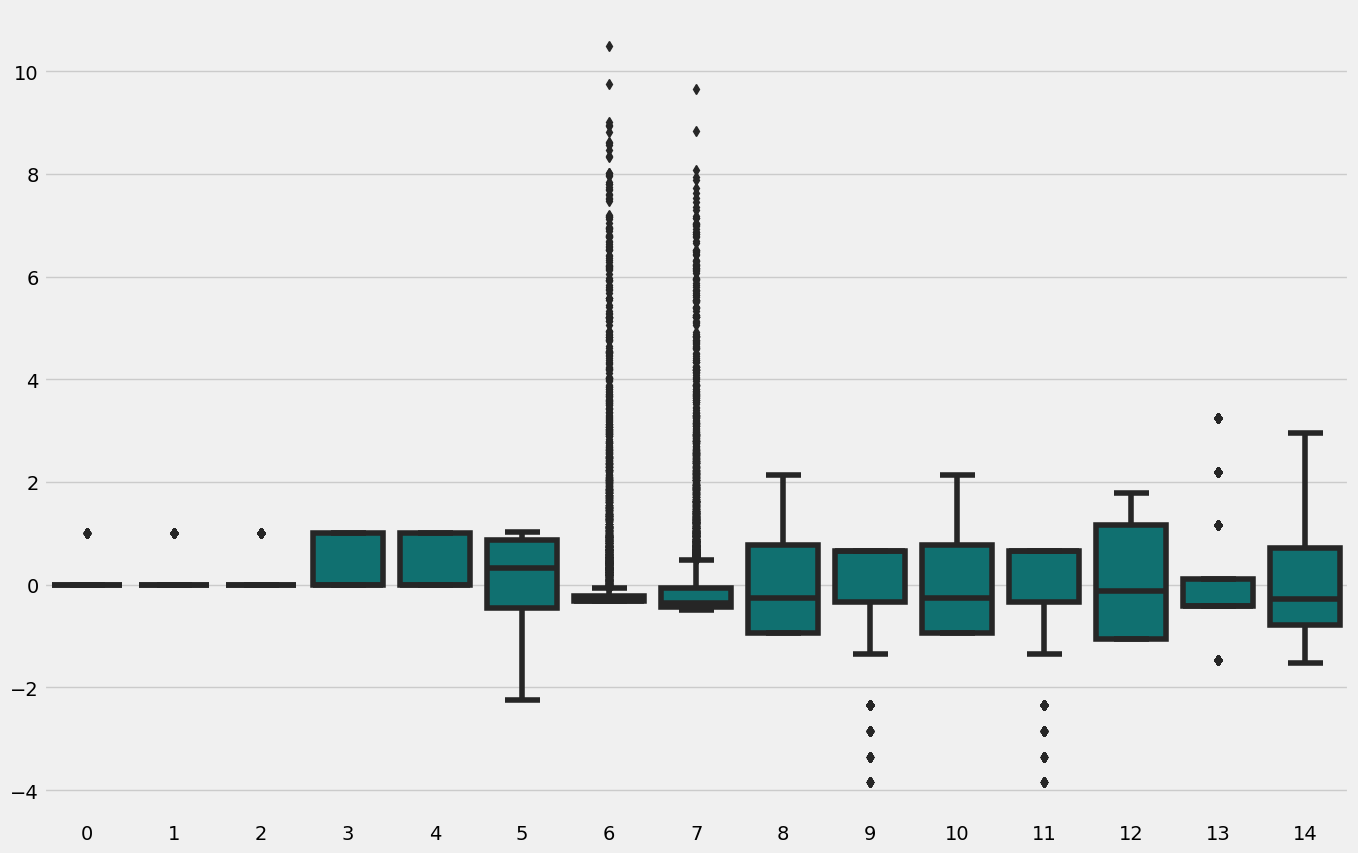

In [5]:
sns.boxplot(df, color="teal")

### PCA Components

In [6]:
df.shape

(7615, 15)

In [7]:
model_array = df.to_numpy()

In [8]:
# # defining a utility function for testing the clustering algorithms
# def plot_clusters(data, algorithm, kwds):
#     # cluster the data while taking the time the process needs 
#     start_time = time.time()
#     labels = algorithm(**kwds).fit_predict(data)
#     end_time = time.time()
    
#     # defining the colors for visual representation
#     palette = sns.color_palette('bright', np.unique(labels).max() + 1)
#     colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    
#     # plotting the data, removing the axis and adding title and time 
#     plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
#     frame = plt.gca()
#     frame.axes.get_xaxis().set_visible(False)
#     frame.axes.get_yaxis().set_visible(False)
#     plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
#     plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

### Principal Components Analysis

In [9]:
from sklearn.decomposition import PCA
# Initialize PCA
pca = PCA(n_components=7)

# Apply PCA
pca_result = pca.fit_transform(model_array)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

# Check explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)
total_expalined_variance = pca.explained_variance_ratio_.sum()
print("Total explained variance ratio:", total_expalined_variance)

Explained variance ratio: [0.40700663 0.16064222 0.14870583 0.0857275  0.07895196 0.06180043
 0.0269757 ]
Total explained variance ratio: 0.9698102589319644


### K-Means

In [10]:
# Initialize KMeans with desired number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=6, random_state=42)

# Fit KMeans on PCA-reduced data
kmeans.fit(pca_df)

# Get cluster labels
pca_df['cluster_kmeans'] = kmeans.labels_


d:\DS\ml-pueblos\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


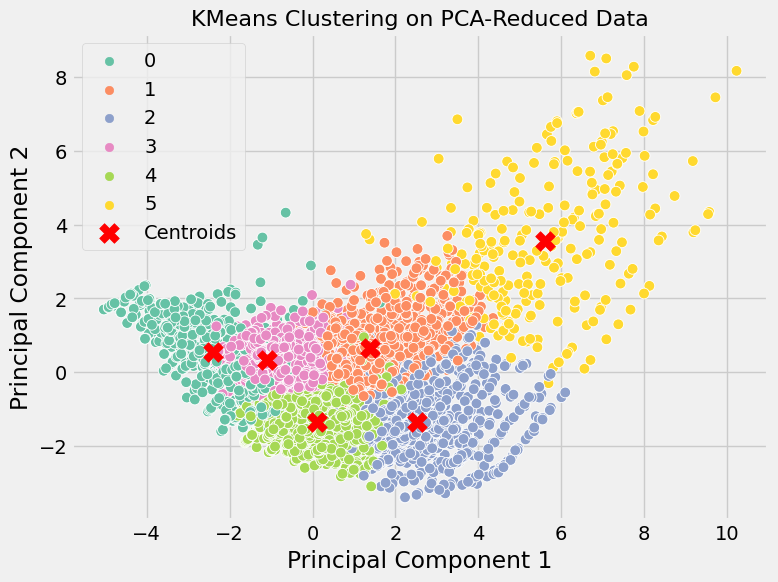

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster_kmeans', data=pca_df, palette='Set2', s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', label='Centroids', marker='X')
plt.title('KMeans Clustering on PCA-Reduced Data', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


KeyboardInterrupt: 

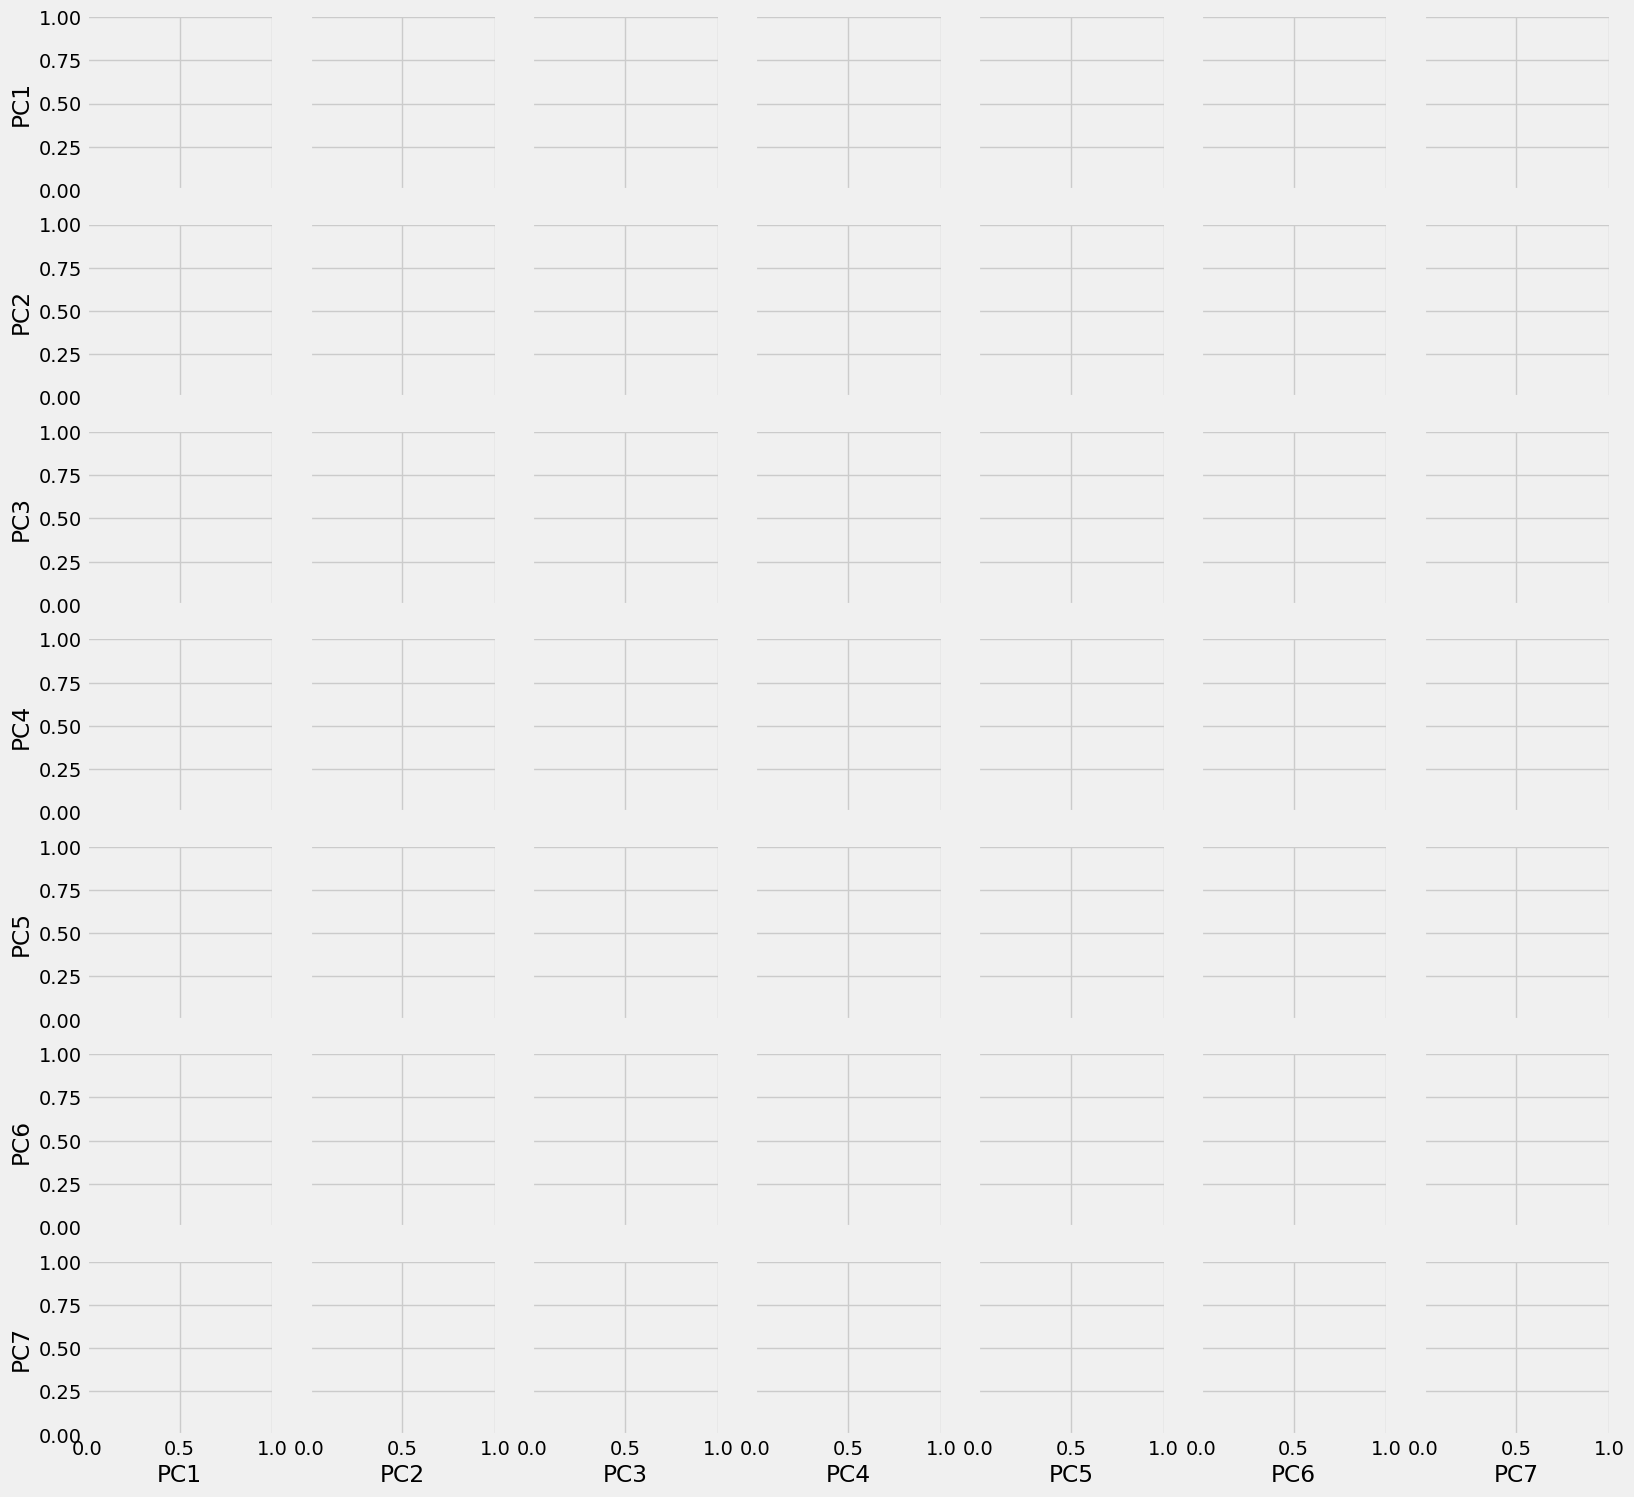

In [12]:
sns.pairplot(pca_df, hue='cluster_kmeans',  palette='Set2')

### Agglomerative Clustering

In [ ]:
# Initialize KMeans with desired number of clusters (e.g., 3)
agg_cluster = AgglomerativeClustering(n_clusters= 6, linkage='ward')

# Fit KMeans on PCA-reduced data
agg_cluster.fit_predict(model_array)

# Get cluster labels
pca_df['cluster_agg'] = agg_cluster.labels_


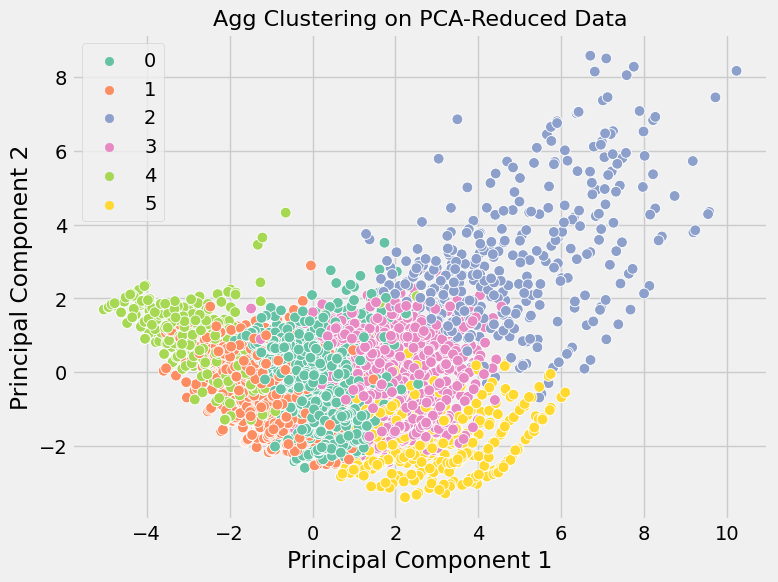

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster_agg', data=pca_df, palette='Set2', s=60)
plt.title('Agg Clustering on PCA-Reduced Data', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


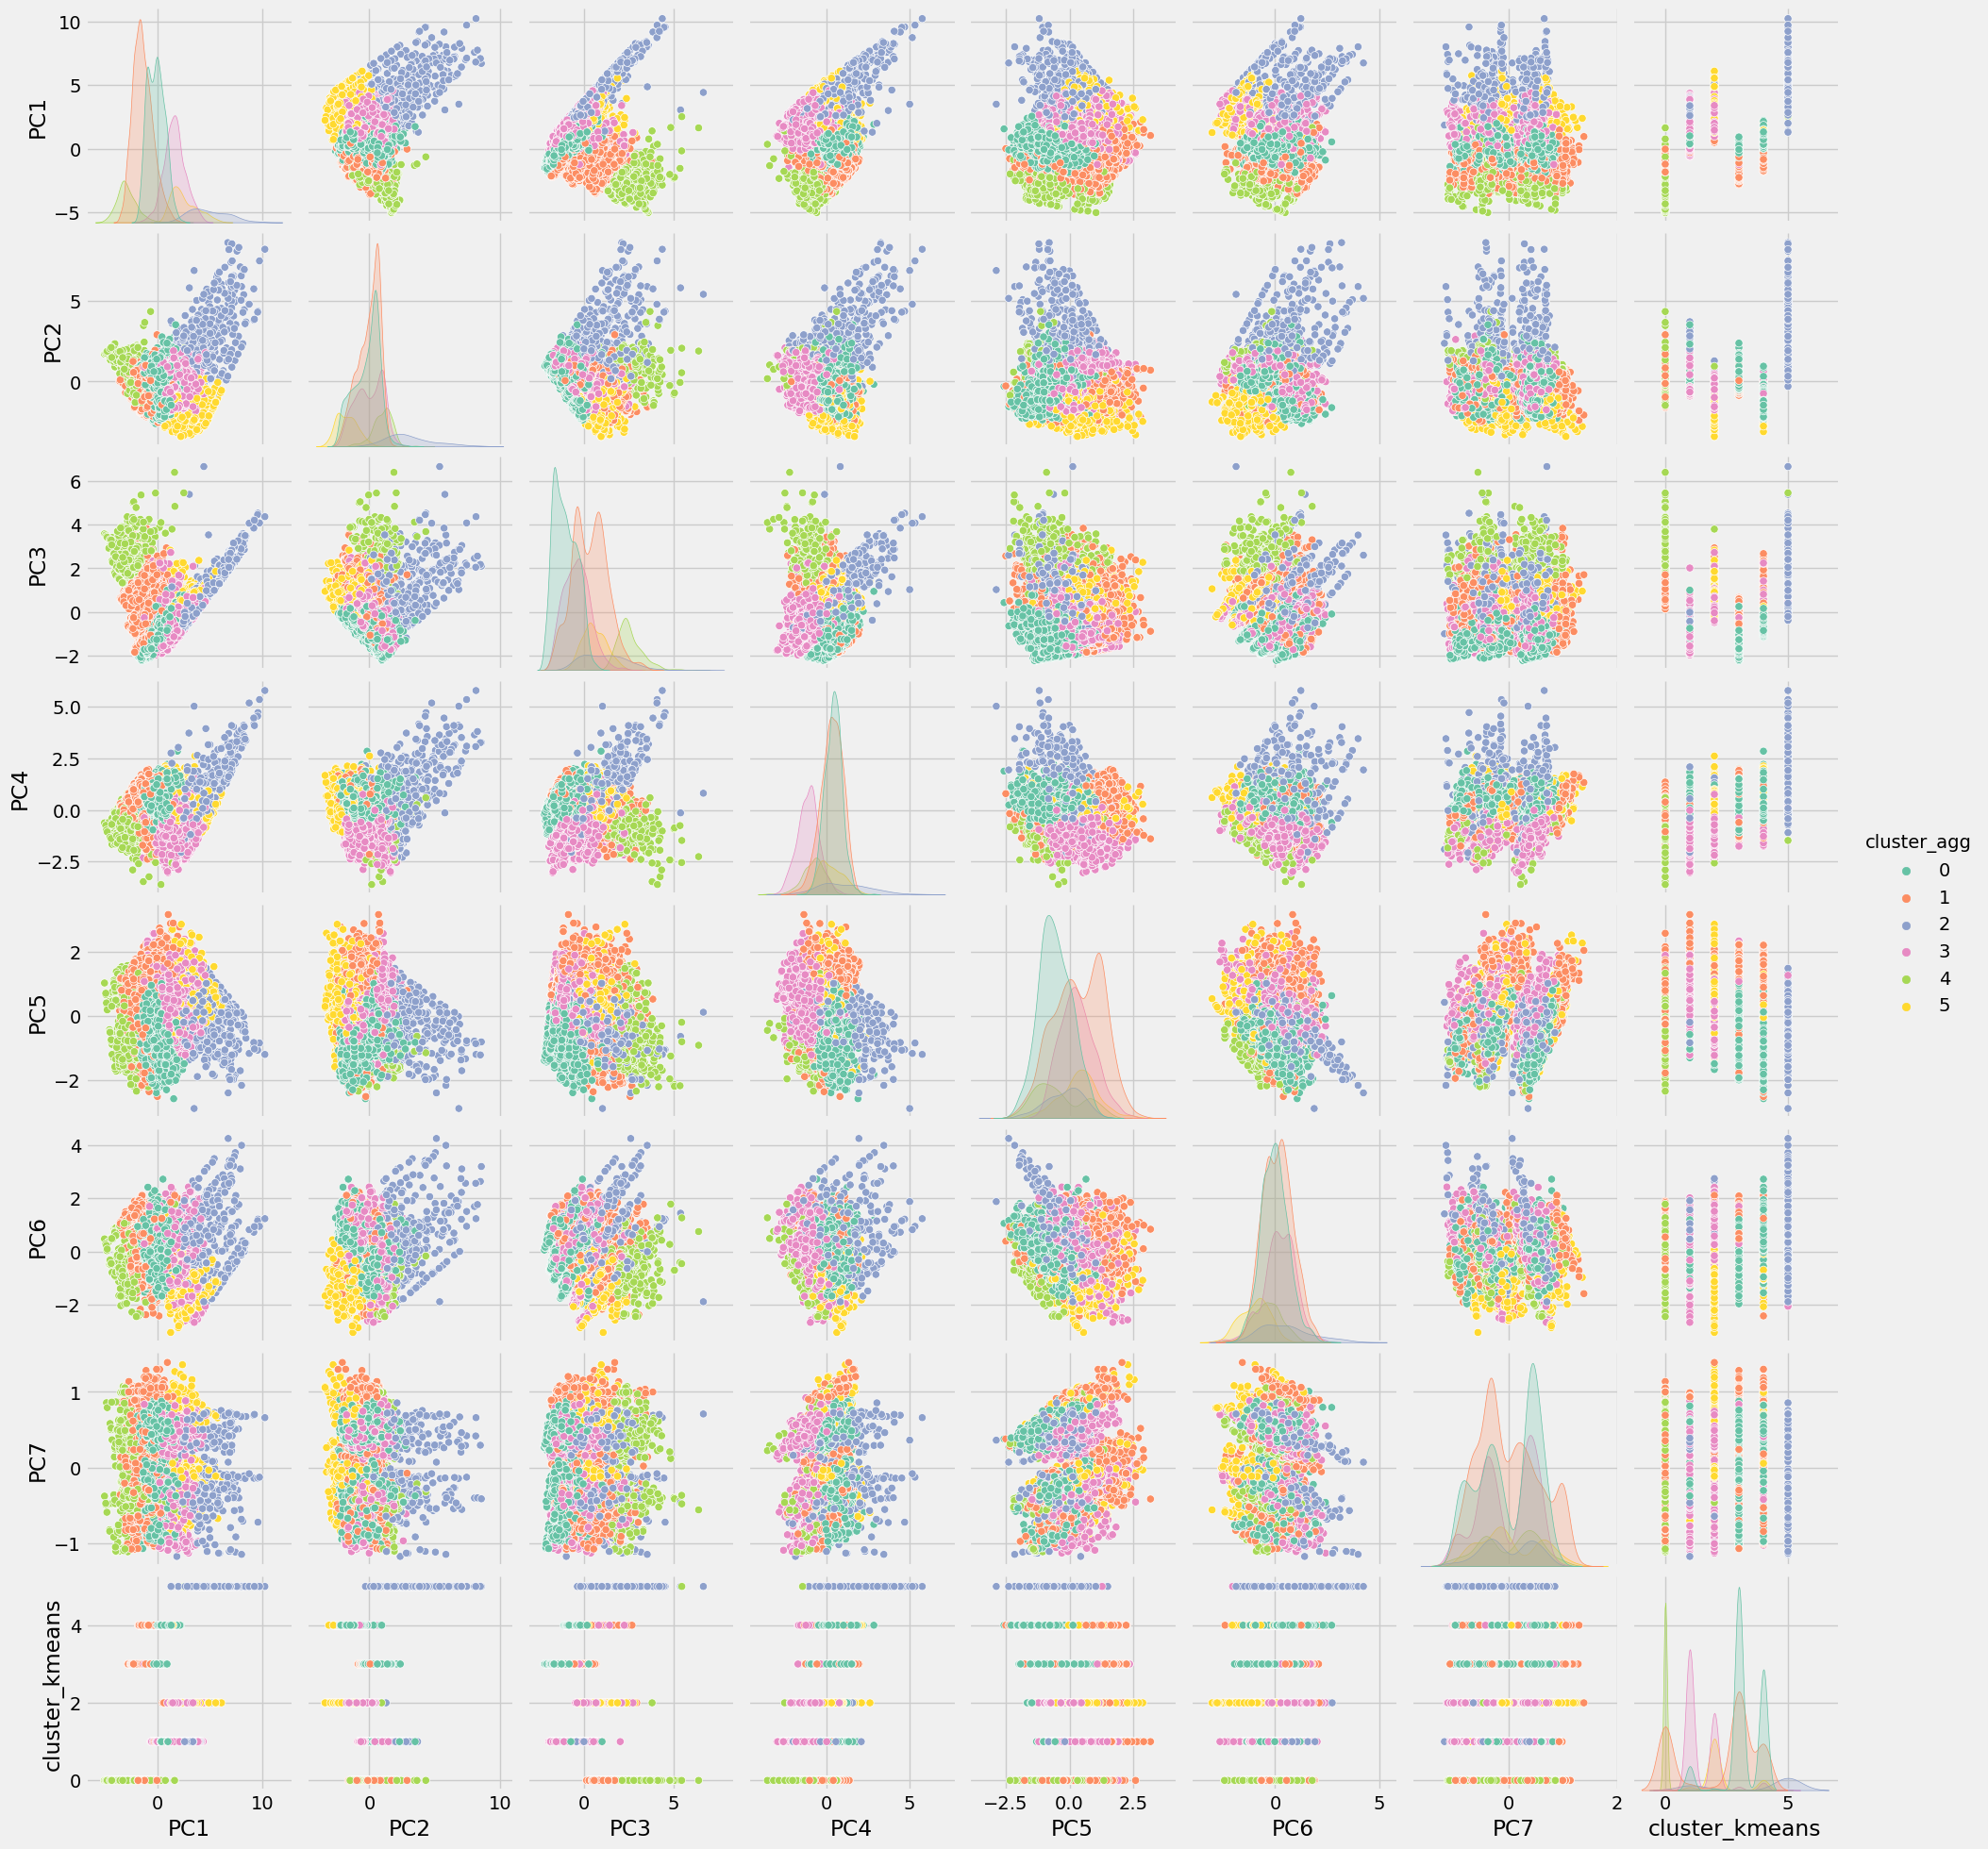

In [ ]:
sns.pairplot(pca_df, hue='cluster_agg',  palette='Set2')

### Dendogram

In [2]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import numpy as np


# Hierarchical clustering
linked = linkage(pca_df, method='ward')

# Plot dendrogram with color_threshold
plt.figure(figsize=(10, 6))
dendro = dendrogram(linked, color_threshold=1.5)

# Extract color mapping
colors = set(dendro['color_list'])

# Create legend
for color in colors:
    plt.plot([], [], color=color, label=f'Cluster {color}')

plt.legend(title='Clusters')
plt.title('Dendrogram with Legend')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


NameError: name 'pca_df' is not defined

In [1]:
# Plotting the dendrogram of our data
plt.figure(figsize=(20, 10))
plt.title('Dendrogram')
plt.ylabel('Dissimilarity')
plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(pca_df, method = 'ward'))
# Extract color mapping
colors = set(dendro['color_list'])

# Create legend
for color in colors:
    plt.plot([], [], color=color, label=f'Cluster {color}')

plt.show()

NameError: name 'plt' is not defined

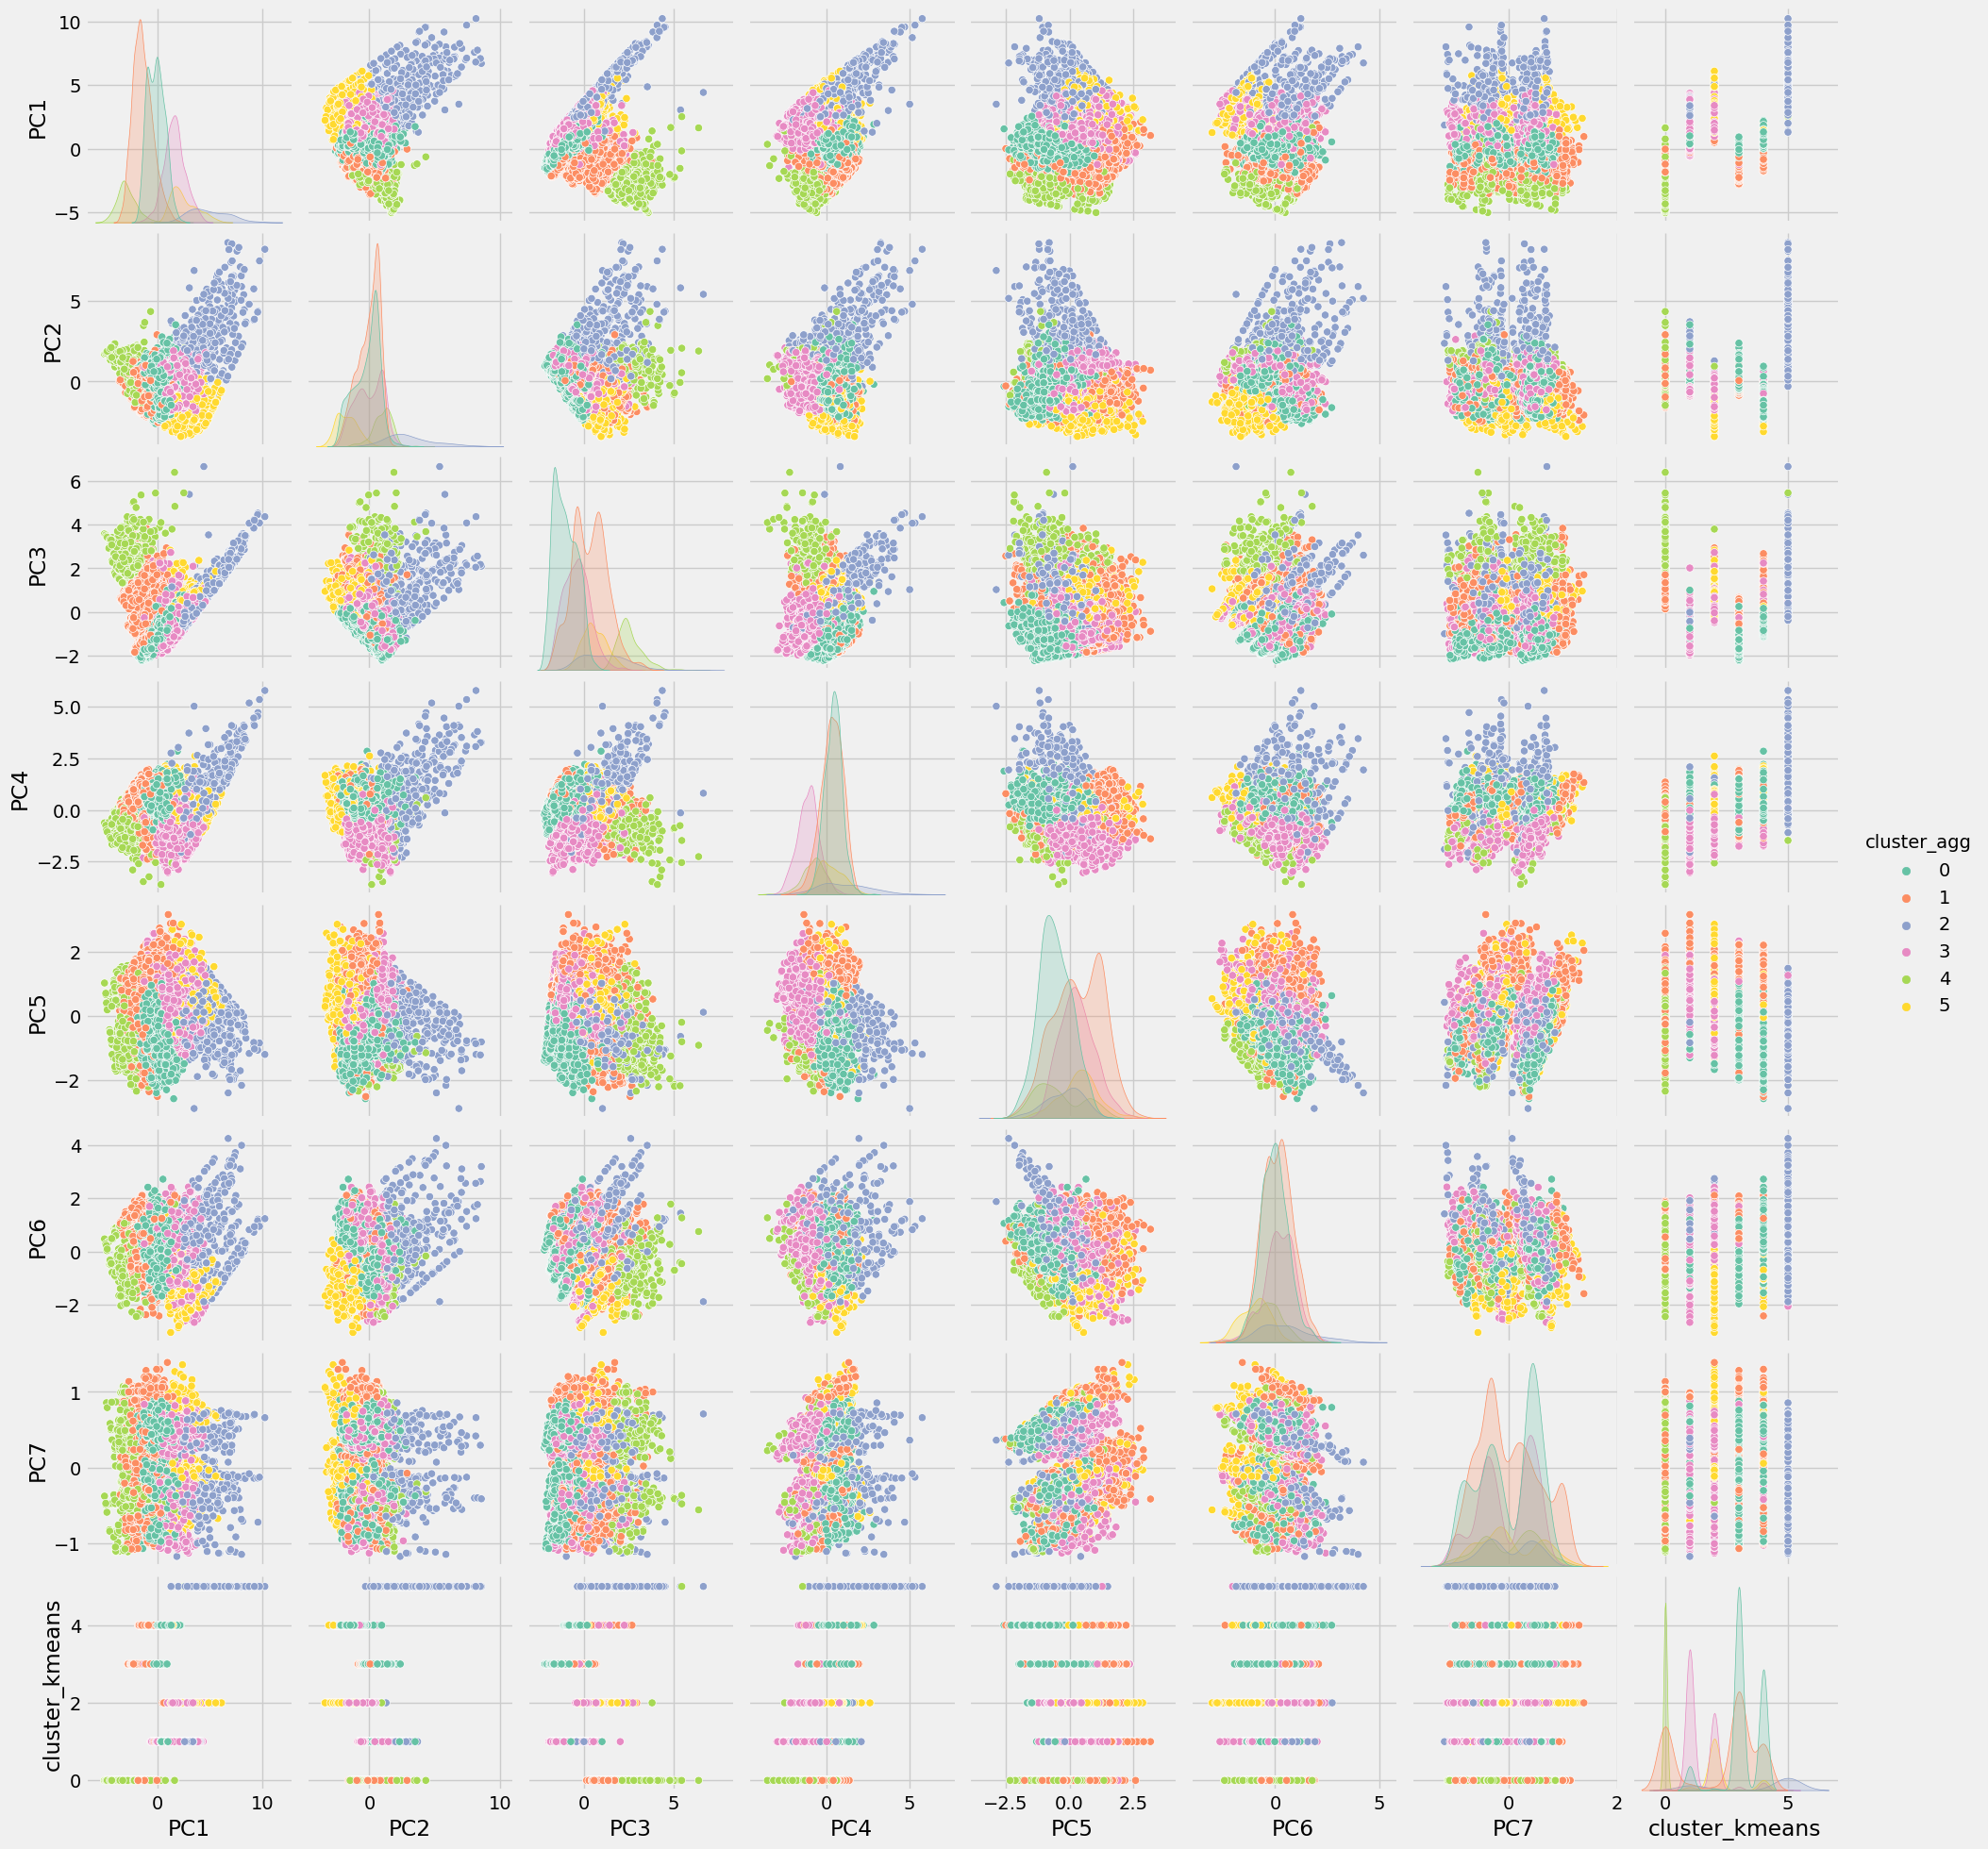

In [ ]:
sns.pairplot(pca_df, hue='cluster_agg',  palette='Set2')

In [ ]:
# Plotting the dendrogram of our data
plt.figure(figsize=(20, 10))
plt.title('Dendrogram')
plt.ylabel('Dissimilarity')
plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(pca_df, method = 'ward'))
plt.show()

### DBSCAN

Doesnt' make sense for our case, as our data is very close together

In [60]:
# Initialize KMeans with desired number of clusters (e.g., 3)
dbscan_cluster = DBSCAN(eps = 0.025, min_samples = 7)

# Fit KMeans on PCA-reduced data
dbscan_cluster.fit_predict(model_array)

# Get cluster labels
pca_df['cluster_dbscan'] = dbscan_cluster.labels_


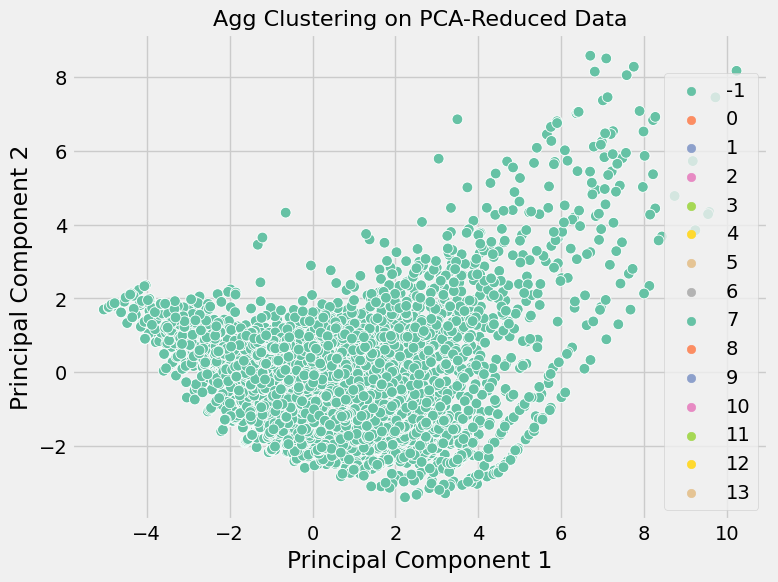

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster_dbscan', data=pca_df, palette='Set2', s=60)
plt.title('Agg Clustering on PCA-Reduced Data', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

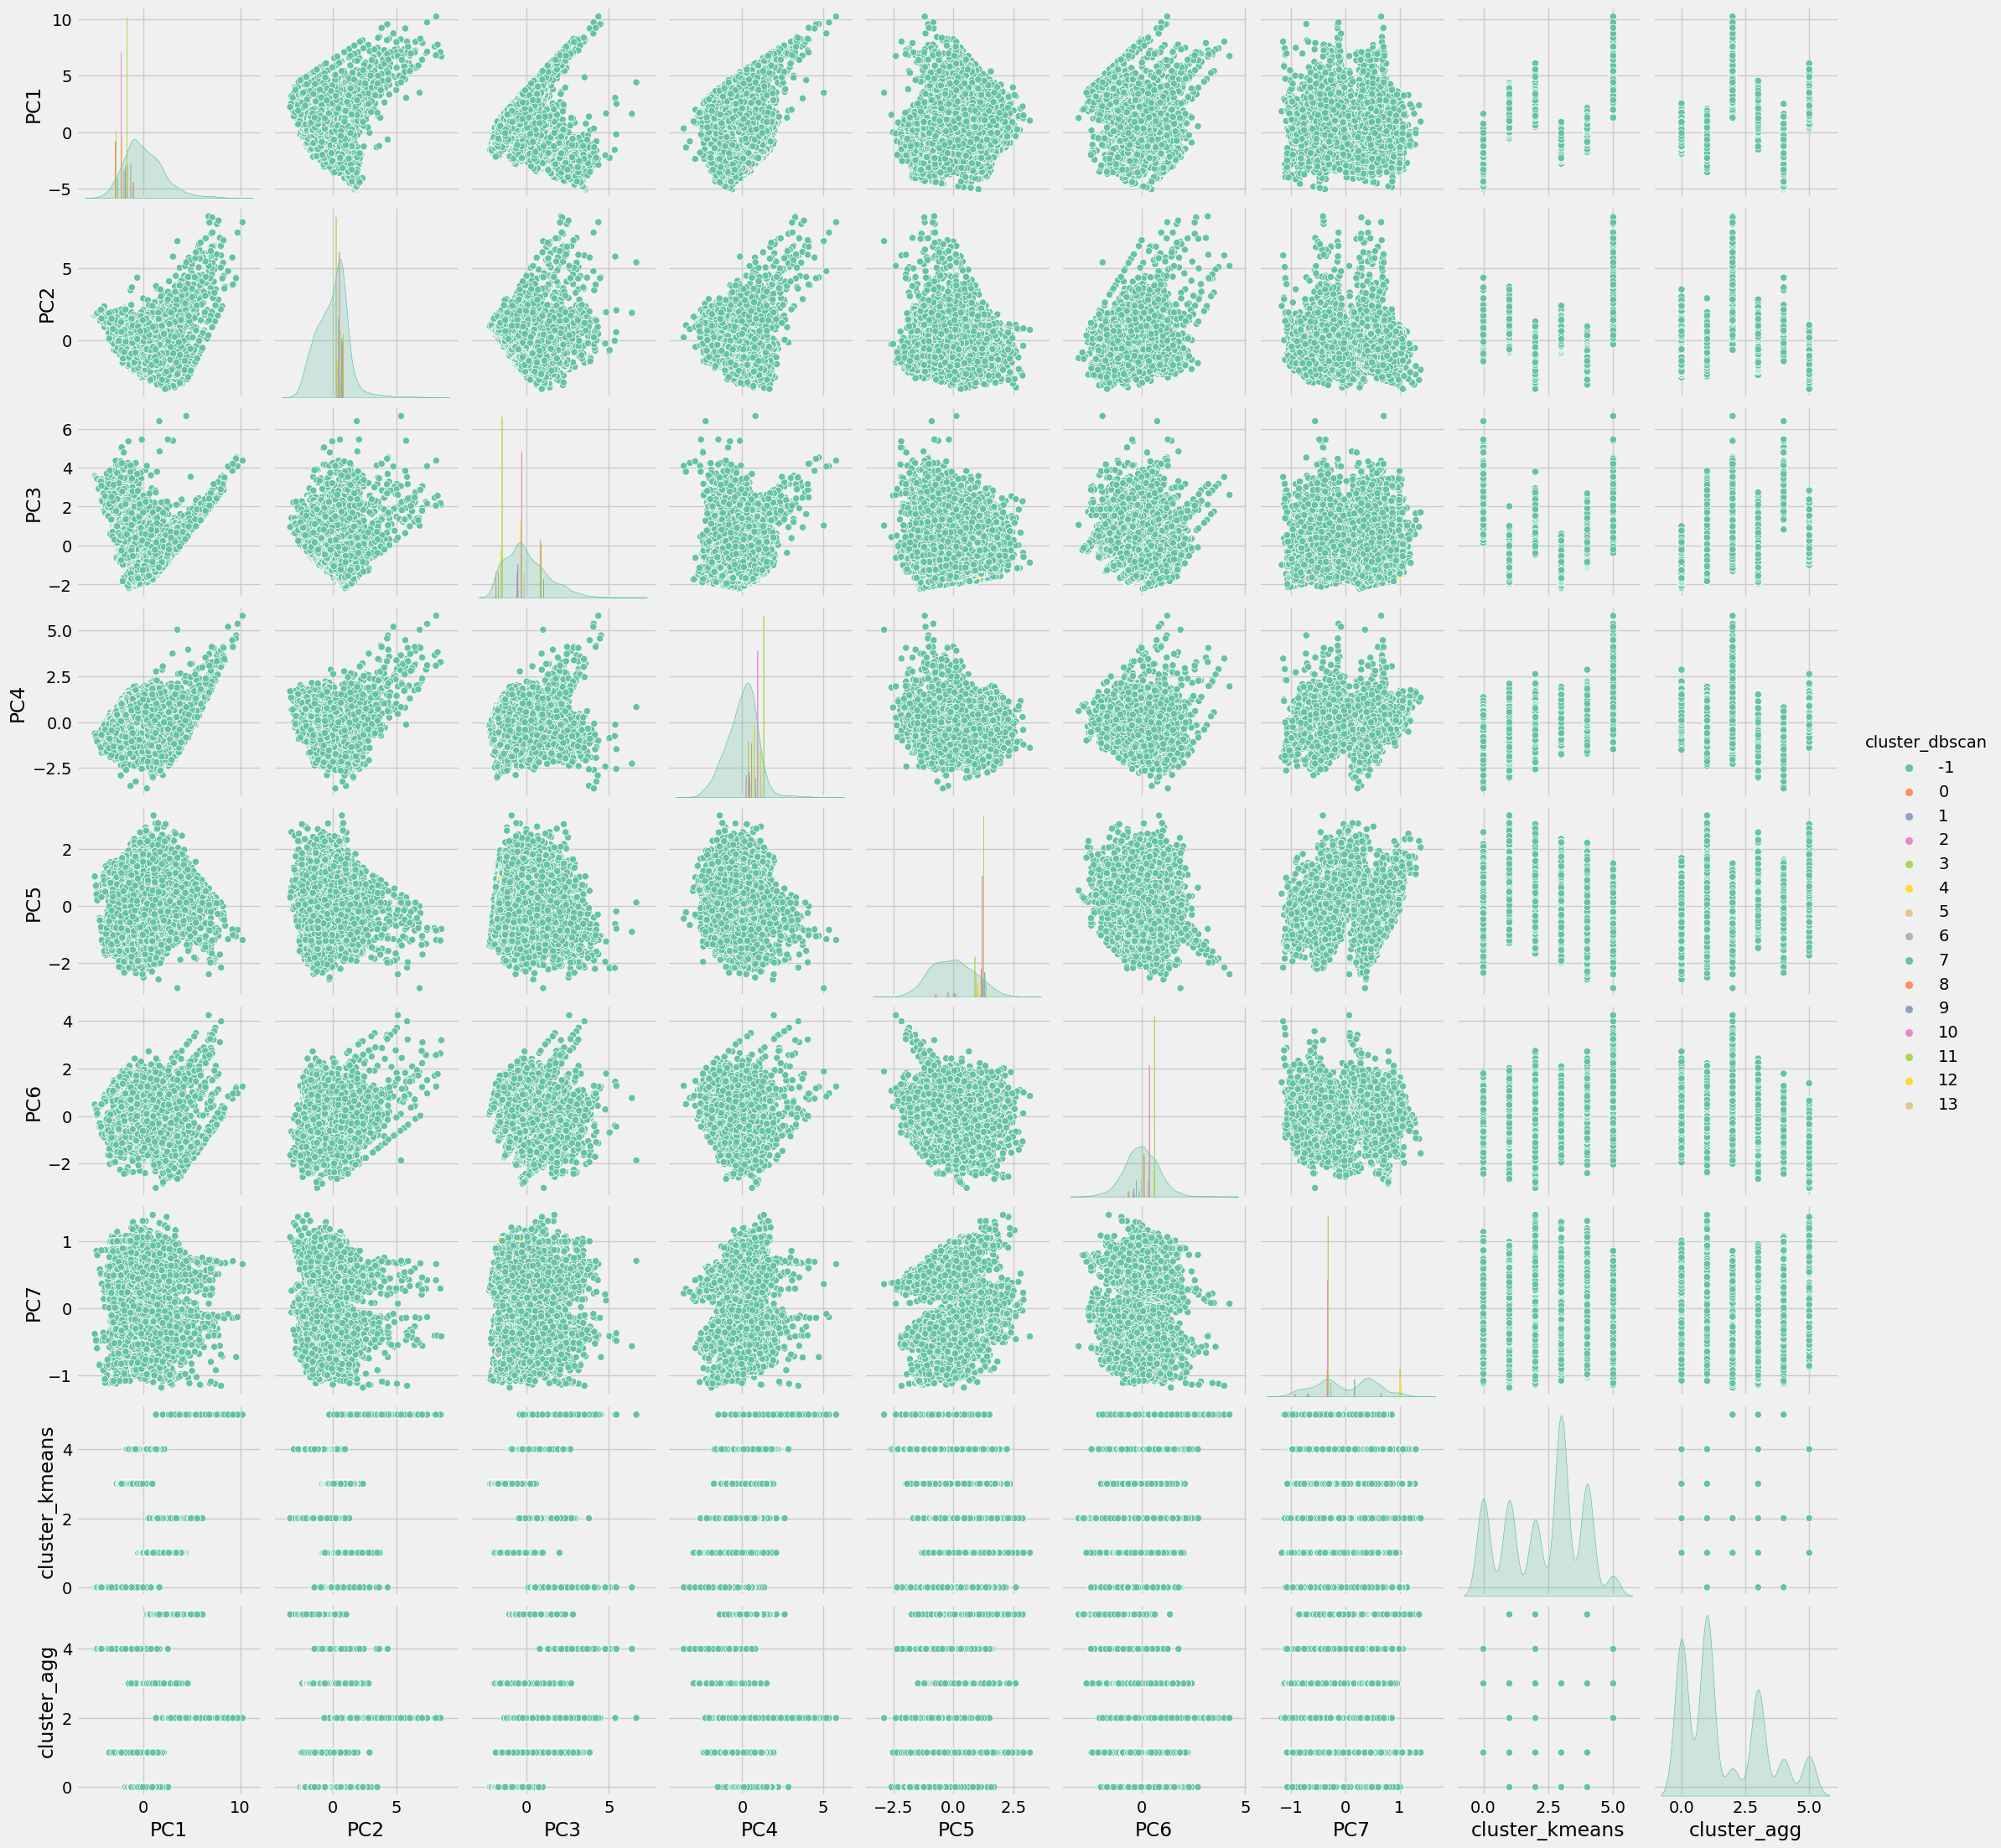

In [62]:
sns.pairplot(pca_df, hue='cluster_dbscan',  palette='Set2')